<a href="https://colab.research.google.com/github/DigitalGoldRush/Project-2-Emotional-recognition/blob/main/emotion_recognition_model_test_final_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from tensorflow import keras
from keras import layers
from keras import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
RANDOM_SEED = 123


In [4]:
#Faster way to upload zip files from gdrive to colab
# ID of Kaggle emotional dataset
! gdown --id 1wrwLq6DqNHLDxU18RYUPY0WcV4ZNG70P

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wrwLq6DqNHLDxU18RYUPY0WcV4ZNG70P
To: /content/emotional dataset.zip
100% 62.6M/62.6M [00:00<00:00, 96.2MB/s]


In [5]:
# zip file opener
!pip install patool
import patoolib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 2.8 MB/s 


In [6]:
patoolib.extract_archive('/content/emotional dataset.zip')

patool: Extracting /content/emotional dataset.zip ...
patool: running /usr/bin/7z x -o./Unpack_ucp_qjhw -- "/content/emotional dataset.zip"
patool: ... /content/emotional dataset.zip extracted to `emotional dataset' (multiple files in root).


'emotional dataset'

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

### Data Preparation

In [8]:
# data preparation
train_dir = '/content/emotional dataset/Training/Training'
test_dir = '/content/emotional dataset/Testing/Testing'

train_angry_dir = '/content/emotional dataset/Training/Training/Angry'
train_fear_dir = '/content/emotional dataset/Training/Training/Fear'
train_happy_dir = '/content/emotional dataset/Training/Training/Happy'
train_neutral_dir = '/content/emotional dataset/Training/Training/Neutral'
train_sad_dir = '/content/emotional dataset/Training/Training/Sad'
train_surprise_dir = '/content/emotional dataset/Training/Training/Suprise'

test_angry_dir = '/content/emotional dataset/Testing/Testing/Angry'
test_fear_dir = '/content/emotional dataset/Testing/Testing/Fear'
test_happy_dir = '/content/emotional dataset/Testing/Testing/Happy'
test_neural_dir = '/content/emotional dataset/Testing/Testing/Neutral'
test_sad_dir = '/content/emotional dataset/Testing/Testing/Sad'
test_surprise_dir = '/content/emotional dataset/Testing/Testing/Suprise'

dir_list = [train_angry_dir, train_fear_dir, train_happy_dir,
           train_neutral_dir, train_sad_dir, train_surprise_dir,
           test_angry_dir, test_fear_dir, test_happy_dir,
           test_neural_dir, test_sad_dir, test_surprise_dir]

for d in dir_list:
    print(d, len(os.listdir(d)))


/content/emotional dataset/Training/Training/Angry 3995
/content/emotional dataset/Training/Training/Fear 4097
/content/emotional dataset/Training/Training/Happy 7215
/content/emotional dataset/Training/Training/Neutral 4965
/content/emotional dataset/Training/Training/Sad 4830
/content/emotional dataset/Training/Training/Suprise 3171
/content/emotional dataset/Testing/Testing/Angry 958
/content/emotional dataset/Testing/Testing/Fear 1024
/content/emotional dataset/Testing/Testing/Happy 1774
/content/emotional dataset/Testing/Testing/Neutral 1233
/content/emotional dataset/Testing/Testing/Sad 1247
/content/emotional dataset/Testing/Testing/Suprise 831


In [9]:
# image generator

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=64,
                                                   class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                             target_size=(150,150),
                                                             batch_size=62,
                                                             class_mode='categorical')

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [10]:
# callback function
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                 restore_best_weights=True)

### Models (5)

#### model = RMS optimizer, Relu Activation

In [11]:
# build the model = RMS Optimizer, Relu Activation

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(6, activation='softmax')  
])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [27]:
# Fit the model
history = model.fit(train_generator,
                   epochs=5,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)


Epoch 1/5
442/442 [==============================] - 152s 344ms/step - loss: 1.4766 - accuracy: 0.4057 - val_loss: 1.3450 - val_accuracy: 0.4736
Epoch 2/5
442/442 [==============================] - 152s 343ms/step - loss: 1.4315 - accuracy: 0.4267 - val_loss: 1.3261 - val_accuracy: 0.4793
Epoch 3/5
442/442 [==============================] - 152s 344ms/step - loss: 1.4073 - accuracy: 0.4401 - val_loss: 1.3590 - val_accuracy: 0.4691
Epoch 4/5
442/442 [==============================] - 149s 336ms/step - loss: 1.3886 - accuracy: 0.4483 - val_loss: 1.2543 - val_accuracy: 0.5200
Epoch 5/5
442/442 [==============================] - 147s 333ms/step - loss: 1.3641 - accuracy: 0.4621 - val_loss: 1.2214 - val_accuracy: 0.5326


In [28]:
# Evaluate the model loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

# Display the model's loss and accuracy results
print(f"Model Loss: {test_loss}, Model Accuracy: {test_acc}")


114/114 - 4s - loss: 1.2214 - accuracy: 0.5326 - 4s/epoch - 37ms/step
Model Loss: 1.2213599681854248, Model Accuracy: 0.532616376876831


##### Accuracy/Plot Graph

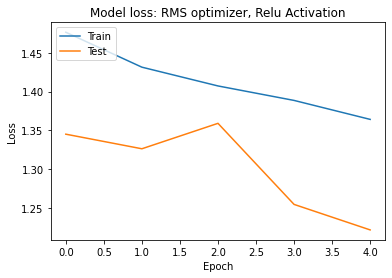

In [29]:
# Plot the loss function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Model loss: RMS optimizer, Relu Activation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

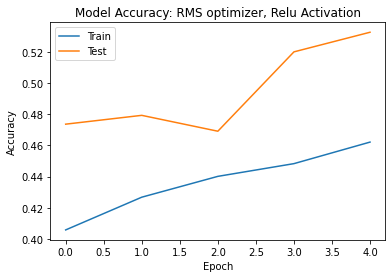

In [30]:
# Plot the accuracy function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')

plt.title('Model Accuracy: RMS optimizer, Relu Activation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],
            loc='upper left')
plt.show()

#### model_adam = ADAM optimizer, Relu **Activation** 

In [31]:
# Build model_adam = ADAM optimizer, Relu Activation function

model_adam = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

from tensorflow.keras.optimizers import Adam

# Compile the model
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_adam.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 64)      

In [32]:
# Fit the model 
history_adam = model_adam.fit(train_generator,
                   epochs=5,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)


Epoch 1/5
442/442 [==============================] - 159s 359ms/step - loss: 1.7411 - accuracy: 0.2568 - val_loss: 1.7019 - val_accuracy: 0.2626
Epoch 2/5
442/442 [==============================] - 149s 337ms/step - loss: 1.7083 - accuracy: 0.2712 - val_loss: 1.6479 - val_accuracy: 0.3153
Epoch 3/5
442/442 [==============================] - 143s 323ms/step - loss: 1.6798 - accuracy: 0.2903 - val_loss: 1.5800 - val_accuracy: 0.3509
Epoch 4/5
442/442 [==============================] - 139s 316ms/step - loss: 1.6285 - accuracy: 0.3247 - val_loss: 1.5568 - val_accuracy: 0.3849
Epoch 5/5
442/442 [==============================] - 150s 340ms/step - loss: 1.5655 - accuracy: 0.3624 - val_loss: 1.4187 - val_accuracy: 0.4415


In [33]:
# Evaluate the model_adam loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model_adam.evaluate(validation_generator, verbose=2)

# Display the model's loss and accuracy results
print(f"Model_Adam Loss: {test_loss}, Model_Adam Accuracy: {test_acc}")


114/114 - 5s - loss: 1.4187 - accuracy: 0.4415 - 5s/epoch - 41ms/step
Model_Adam Loss: 1.4186831712722778, Model_Adam Accuracy: 0.4414886236190796


##### Accuracy/Plot Graph

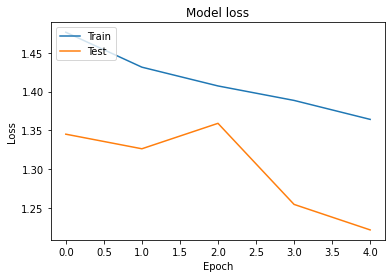

In [34]:
# Plot the loss function for the model
import matplotlib.pyplot as plt

plt.plot(history_adam.history['loss'], label='train')
plt.plot(history_adam.history['val_loss'], label='test')

plt.title('Model loss: ADAM optimizer, Relu Activation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

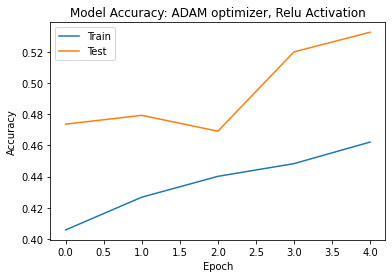

In [35]:
# Plot the accuracy function for the model
import matplotlib.pyplot as plt

plt.plot(history_adam.history['accuracy'], label='train')
plt.plot(history_adam.history['val_accuracy'], label='test')

plt.title('Model Accuracy: ADAM optimizer, Relu Activation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],
            loc='upper left')
plt.show()

#### model_swish = RMS Optimizer, Swish **Activation** 


In [36]:
# Build model_swish = RMS Optimizer, Swish Activation

model_swish = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='swish', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='swish'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# compile the model_swish
model_swish.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy']) 
model_swish.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 64)      

In [37]:
# Fit the model 
history_swish = model_swish.fit(train_generator,
                   epochs=5,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)


Epoch 1/5
442/442 [==============================] - 161s 362ms/step - loss: 1.7413 - accuracy: 0.2567 - val_loss: 1.6784 - val_accuracy: 0.3120
Epoch 2/5
442/442 [==============================] - 143s 323ms/step - loss: 1.7073 - accuracy: 0.2786 - val_loss: 1.6130 - val_accuracy: 0.3341
Epoch 3/5
442/442 [==============================] - 141s 320ms/step - loss: 1.6697 - accuracy: 0.3065 - val_loss: 1.5718 - val_accuracy: 0.3605
Epoch 4/5
442/442 [==============================] - 140s 317ms/step - loss: 1.6414 - accuracy: 0.3221 - val_loss: 1.5011 - val_accuracy: 0.4009
Epoch 5/5
442/442 [==============================] - 141s 320ms/step - loss: 1.6150 - accuracy: 0.3394 - val_loss: 1.5189 - val_accuracy: 0.3968


In [38]:
# Evaluate the model loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model_swish.evaluate(validation_generator, verbose=2)

# Display the model's loss and accuracy results
print(f"Model_swish Loss: {test_loss}, Model_swish Accuracy: {test_acc}")


114/114 - 4s - loss: 1.5189 - accuracy: 0.3968 - 4s/epoch - 38ms/step
Model_swish Loss: 1.518909215927124, Model_swish Accuracy: 0.39677372574806213


##### Accuracy/Plot Graph

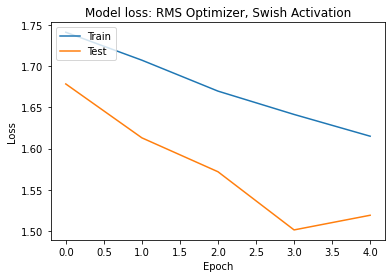

In [39]:
# Plot the loss function for the model
import matplotlib.pyplot as plt

plt.plot(history_swish.history['loss'], label='train')
plt.plot(history_swish.history['val_loss'], label='test')

plt.title('Model loss: RMS Optimizer, Swish Activation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

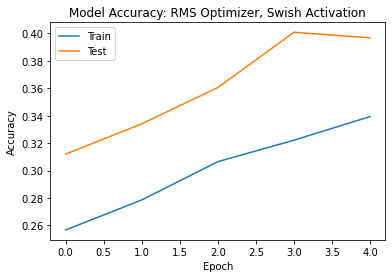

In [40]:
# Plot the accuracy function for the model
import matplotlib.pyplot as plt

plt.plot(history_swish.history['accuracy'], label='train')
plt.plot(history_swish.history['val_accuracy'], label='test')

plt.title('Model Accuracy: RMS Optimizer, Swish Activation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],
            loc='upper left')
plt.show()

#### model_adam_swish = ADAM optimizer, Swish Activation

In [41]:
# Build model_adam_swish = ADAM Optimizer, Swish Activation

model_adam_swish = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='swish', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='swish'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model_adam_swish.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])
model_adam_swish.summary()
# keras.utils.plot_model(model_adam_swish)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 64)      

In [42]:
# Fit the model 
history_adam_swish = model_adam_swish.fit(train_generator,
                   epochs=5,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)


Epoch 1/5
442/442 [==============================] - 141s 318ms/step - loss: 1.7380 - accuracy: 0.2583 - val_loss: 1.6957 - val_accuracy: 0.3078
Epoch 2/5
442/442 [==============================] - 140s 317ms/step - loss: 1.7046 - accuracy: 0.2817 - val_loss: 1.6297 - val_accuracy: 0.3427
Epoch 3/5
442/442 [==============================] - 139s 315ms/step - loss: 1.6708 - accuracy: 0.3043 - val_loss: 1.5496 - val_accuracy: 0.3947
Epoch 4/5
442/442 [==============================] - 140s 316ms/step - loss: 1.6325 - accuracy: 0.3292 - val_loss: 1.5055 - val_accuracy: 0.4055
Epoch 5/5
442/442 [==============================] - 139s 314ms/step - loss: 1.6035 - accuracy: 0.3443 - val_loss: 1.4942 - val_accuracy: 0.4065


In [43]:
# Evaluate the model loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model_adam_swish.evaluate(validation_generator, verbose=2)

print(f"Model_adam_swish Loss: {test_loss}, Model_adam_swish Accuracy: {test_acc}")



114/114 - 4s - loss: 1.4942 - accuracy: 0.4065 - 4s/epoch - 36ms/step
Model_adam_swish Loss: 1.4942370653152466, Model_adam_swish Accuracy: 0.40653741359710693


##### Accuracy/Plot Graph

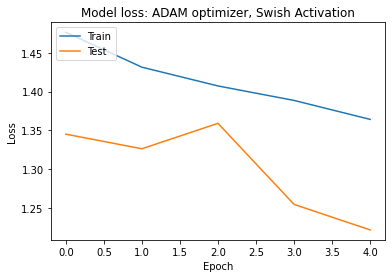

In [44]:
# Plot the loss function for the model
import matplotlib.pyplot as plt

plt.plot(history_adam_swish.history['loss'], label='train')
plt.plot(history_adam_swish.history['val_loss'], label='test')

plt.title('Model loss: ADAM optimizer, Swish Activation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

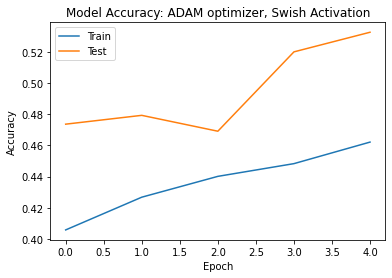

In [45]:
# Plot the accuracy function for the model
import matplotlib.pyplot as plt

plt.plot(history_adam_swish.history['accuracy'], label='train')
plt.plot(history_adam_swish.history['val_accuracy'], label='test')

plt.title('Model Accuracy: ADAM optimizer, Swish Activation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],
            loc='upper left')
plt.show()

#### model_cnn = Convolutional Neural Network

In [49]:
# Set the CNN model_CNN 

import tensorflow as tf

model_CNN = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model_CNN.compile(optimizer=RMSprop(lr=0.001),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])
model_CNN.summary()





Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 17, 17, 64)      

In [50]:
# Fit the model 
history_CNN = model_CNN.fit(train_generator,
                   epochs=5,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)

Epoch 1/5
442/442 [==============================] - 172s 320ms/step - loss: 1.7499 - accuracy: 0.2537 - val_loss: 1.7050 - val_accuracy: 0.2670
Epoch 2/5
442/442 [==============================] - 141s 320ms/step - loss: 1.6966 - accuracy: 0.2803 - val_loss: 1.5719 - val_accuracy: 0.3639
Epoch 3/5
442/442 [==============================] - 141s 320ms/step - loss: 1.6387 - accuracy: 0.3200 - val_loss: 1.5573 - val_accuracy: 0.3806
Epoch 4/5
442/442 [==============================] - 142s 321ms/step - loss: 1.5798 - accuracy: 0.3555 - val_loss: 1.4532 - val_accuracy: 0.4239
Epoch 5/5
442/442 [==============================] - 140s 318ms/step - loss: 1.5254 - accuracy: 0.3844 - val_loss: 1.3894 - val_accuracy: 0.4514


In [51]:
# Evaluate the model loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model_CNN.evaluate(validation_generator, verbose=2)

print(f"Model_CNN Loss: {test_loss}, Model_CNN Accuracy: {test_acc}")

114/114 - 4s - loss: 1.3894 - accuracy: 0.4514 - 4s/epoch - 36ms/step
Model_CNN Loss: 1.389405369758606, Model_CNN Accuracy: 0.45139381289482117


##### Accuracy/Plot Graph

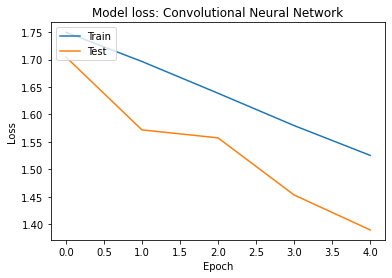

In [52]:
# Plot the loss function for the model
import matplotlib.pyplot as plt

plt.plot(history_CNN.history['loss'], label='train')
plt.plot(history_CNN.history['val_loss'], label='test')

plt.title('Model loss: Convolutional Neural Network')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

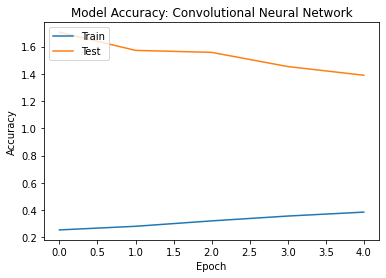

In [53]:
# Plot the accuracy function for the model
import matplotlib.pyplot as plt

plt.plot(history_CNN.history['accuracy'], label='train')
plt.plot(history_CNN.history['val_loss'], label='test')

plt.title('Model Accuracy: Convolutional Neural Network')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],
            loc='upper left')
plt.show()

### Combined Loss Plot

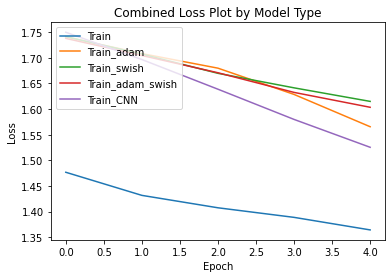

In [54]:
# Plot all loss results on one graph

plt.plot (history.history['loss'], label='train')
plt.plot (history_adam.history['loss'], label='train_adam')
plt.plot (history_swish.history['loss'], label='train_swish')
plt.plot (history_adam_swish.history['loss'], label='train_adam_swish')
plt.plot (history_CNN.history['loss'], label='train_CNN')

plt.title('Combined Loss Plot by Model Type')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Train_adam', 'Train_swish', 'Train_adam_swish', 'Train_CNN'],
            loc='upper left')

plt.show()


### Combined Accuracy Plot

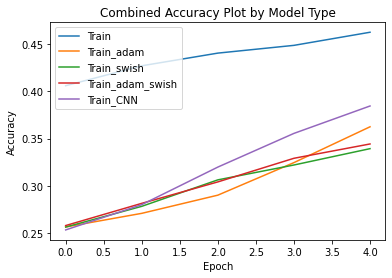

In [55]:
# Plot all accuracy results on one graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history_adam.history['accuracy'], label='train_adam')
plt.plot(history_swish.history['accuracy'], label='train_swish')
plt.plot(history_adam_swish.history['accuracy'], label='train_adam_swish')
plt.plot(history_CNN.history['accuracy'], label='train_CNN')

plt.title('Combined Accuracy Plot by Model Type')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Train_adam', 'Train_swish', 'Train_adam_swish', 'Train_CNN'],
            loc='upper left')
plt.show()

### Confusion Matrix

Confusion Matrix
[[ 81  36 399 122 160 160]
 [ 78  49 404 166 149 178]
 [141  69 685 281 294 304]
 [101  46 490 186 199 211]
 [119  44 477 206 214 187]
 [ 66  30 346 126 132 131]]


Text(69.0, 0.5, 'Truth')

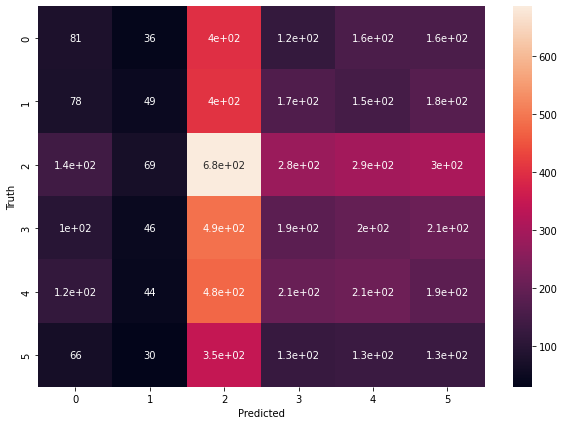

In [56]:
# Confusion Matrix
# model_adam

from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model_adam.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 

Confusion Matrix
[[117  37 246 224 210 124]
 [127  28 270 228 241 130]
 [220  63 483 395 397 216]
 [155  37 341 258 283 159]
 [160  39 311 273 283 181]
 [103  13 230 202 188  95]]


Text(69.0, 0.5, 'Truth')

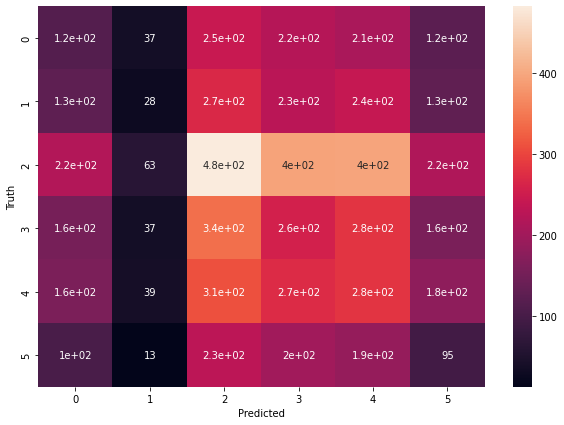

In [57]:
# Confusion Matrix
# model
from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 


Confusion Matrix
[[ 25  50 381 145 101 256]
 [ 30  65 388 154 105 282]
 [ 48  90 705 296 163 472]
 [ 32  79 464 198 117 343]
 [ 24  74 479 208 117 345]
 [ 20  49 347 121  72 222]]


Text(69.0, 0.5, 'Truth')

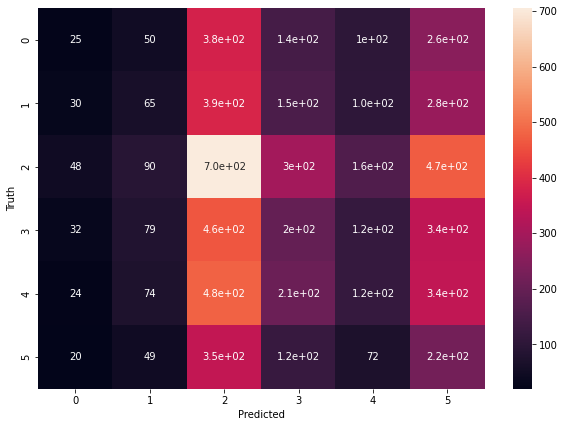

In [58]:
# Confusion Matrix
# model_swish

from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model_swish.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 


Confusion Matrix
[[ 45  11 502 249  49 102]
 [ 38  22 525 281  47 111]
 [ 64  23 955 463  90 179]
 [ 55   7 653 333  54 131]
 [ 69  16 640 327  70 125]
 [ 49   9 419 228  40  86]]


Text(69.0, 0.5, 'Truth')

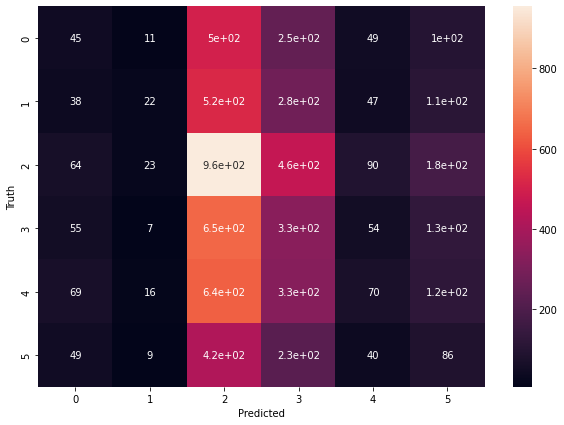

In [59]:
# Confusion Matrix
# model_adam_swish

from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model_adam_swish.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 

Confusion Matrix
[[142 101 296 143 155 121]
 [174 110 302 149 143 146]
 [292 166 517 278 276 245]
 [182 127 368 174 200 182]
 [211 124 390 150 199 173]
 [116  88 248 115 135 129]]


Text(69.0, 0.5, 'Truth')

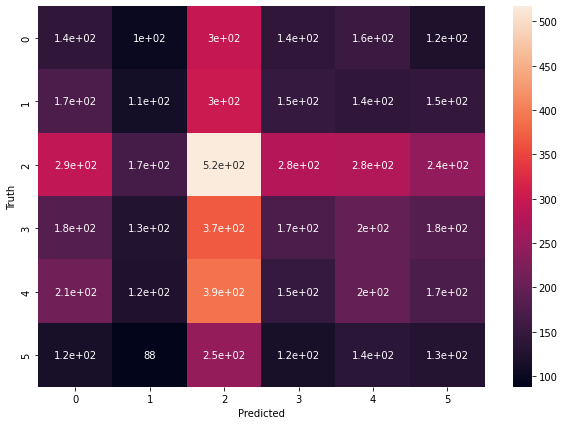

In [60]:
# Confusion Matrix
# model_CNN

from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model_CNN.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### model_adam_swish saved

In [62]:
# save the model to g-drive because files are discarded on colab after a period of time
# change the name each time or it will be overwritten
model.save('model.h5')

#model.save("/content/drive/MyDrive/Colab Notebooks/Project 2_ Emotion Recognition/facial_reco_whole_model_V3")
# change the file name!!